In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv("../Datasets/mnist/train.csv")
ds=ds.values

In [3]:
X=ds[:,1:]
y=ds[:,0]

In [4]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [5]:
print(y)

[1 0 1 ... 7 6 9]


In [35]:
class NeuralNetwork:
    def __init__(self,X,y):
        self.X=(X-X.min())/(X.max()-X.min())
        self.y=y
        self.INPUT_SIZE=X.shape[1]
        self.OUTPUT_SIZE=len(np.unique(y))
        self.H1_SIZE=256
        self.H2_SIZE=64
        self.losses=[]
        
        #Initialise weights
        self.W1=np.random.randn(self.INPUT_SIZE,self.H1_SIZE)
        self.W2=np.random.randn(self.H1_SIZE,self.H2_SIZE)
        self.W3=np.random.rand(self.H2_SIZE,self.OUTPUT_SIZE)
        
        #initialise bias
        self.b1=np.random.random((1,self.H1_SIZE))
        self.b2=np.random.random((1,self.H2_SIZE))
        self.b3=np.random.random((1,self.OUTPUT_SIZE))
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def sigmoid_prime(self,z):
        s=self.sigmoid(z)
        return s*(1-s)
    def softmax(self,z):
        return np.exp(z)/np.sum(np.exp(z),keepdims=True,axis=1)
    def get_prediction(self,test):
        yhat=self.forward(test)
        preds=np.argmax(yhat,axis=1)
        return preds
    def accuracy(self,pred,true_labels):
        return (pred==true_labels).mean()
    def compute_loss(self,y,yhat):
        return -np.sum(y*np.log(yhat))
    def forward(self,x):
        Z1=x.dot(self.W1)+self.b1
        A1=self.sigmoid(Z1)
        Z2=A1.dot(self.W2)+self.b2
        A2=self.sigmoid(Z2)
        Z3=A2.dot(self.W3)+self.b3
        yhat=self.softmax(Z3)
        
        self.activations=[A1,A2,yhat]
        return yhat
    def backprop(self,x,y,yhat,learning_rate=0.01):
        A1,A2,yhat=self.activations
        
        delta3=yhat-y
        dldw3=A2.T.dot(delta3)
        dldb3=delta3.sum(axis=0,keepdims=True)
        
        delta2=delta3.dot(self.W3.T)*(A2*(1-A2))
        dldw2=A1.T.dot(delta2)
        dldb2=delta2.sum(axis=0,keepdims=True)
        
        delta1=delta2.dot(self.W2.T)*(A1*(1-A1))
        dldw1=x.T.dot(delta1)
        dldb1=delta1.sum(axis=0,keepdims=True)
        
        self.W3=self.W3-learning_rate*dldw3
        self.b3=self.b3-learning_rate*dldb3
        
        self.W2=self.W2-learning_rate*dldw2
        self.b2=self.b2-learning_rate*dldb2
        
        self.W1=self.W1-learning_rate*dldw1
        self.b1=self.b1-learning_rate*dldb1
    def get_one_hot_vector(self,labels):
        classes=len(np.unique(labels))
        vectors=np.zeros((labels.shape[0],classes))
        for i,l in enumerate(labels):
            vectors[i,l]=1
        return vectors
    def train(self,learning_rate=0.01,epochs=10,batch_size=128):
        y_one_hot_vector=self.get_one_hot_vector(self.y)
        for e in range(epochs):
            size=0
            while size+batch_size < self.X.shape[0]:
                x_batch=self.X[size:size+batch_size]
                y_batch=self.y[size:size+batch_size]
                size=size+batch_size
                
                y_batch_one_hot=self.get_one_hot_vector(y_batch)
                yhat_batch=self.forward(x_batch)
                self.backprop(x_batch,y_batch_one_hot,yhat_batch,learning_rate=0.01)
            yhat=self.forward(self.X)
            self.losses.append((self.compute_loss(y_one_hot_vector,yhat)))
            print("loss at epoch {} is {} ".format(e,self.losses[-1]))
        

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [37]:
nn = NeuralNetwork(X_train, y_train)

In [38]:
nn.INPUT_SIZE, nn.H1_SIZE, nn.H2_SIZE, nn.OUTPUT_SIZE

(784, 256, 64, 10)

In [39]:
print("First Loss: ", nn.compute_loss(nn.get_one_hot_vector(nn.y), nn.forward(nn.X)))

First Loss:  112911.70367951189


In [40]:
nn.train(learning_rate=0.01, epochs=20, batch_size=128)

loss at epoch 0 is 15819.597047477619 
loss at epoch 1 is 11398.980203905725 
loss at epoch 2 is 9212.94309249586 
loss at epoch 3 is 7767.514800069868 
loss at epoch 4 is 6674.892833352328 
loss at epoch 5 is 5815.286808321989 
loss at epoch 6 is 5112.981993067704 
loss at epoch 7 is 4524.879959291131 
loss at epoch 8 is 4027.3927440529105 
loss at epoch 9 is 3609.2616046036246 
loss at epoch 10 is 3252.087209739765 
loss at epoch 11 is 2939.5869417261533 
loss at epoch 12 is 2666.084360784478 
loss at epoch 13 is 2423.9296997700053 
loss at epoch 14 is 2204.7352221820092 
loss at epoch 15 is 2003.6779168688686 
loss at epoch 16 is 1819.5007098137173 
loss at epoch 17 is 1650.8531922845427 
loss at epoch 18 is 1497.0575251550115 
loss at epoch 19 is 1356.964931264893 


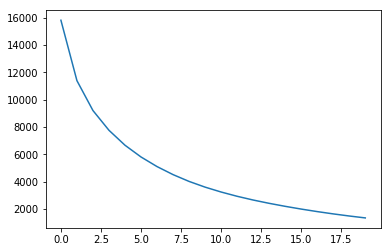

In [41]:
plt.figure()
plt.plot(nn.losses)
plt.show()

In [42]:
preds = nn.get_prediction(X_test)
print("Testing Acc: ", nn.accuracy(preds, y_test))

train_preds = nn.get_prediction(X_train)
print("Training Acc:", nn.accuracy(train_preds, y_train))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


Testing Acc:  0.9085714285714286
Training Acc: 0.9660119047619048
